<a href="https://colab.research.google.com/github/Miller76lite/GEOL558/blob/main/Supervised_First_Pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Supervised First Pass
###Context
#####Knowing the type of rock, knowing the properties and characteristics is very important in the mining and energy industry, so this Dataset details the geochemical variations and compositions (SiO2, TiO2, Al2O3, Fe2O3, …..)of different types of rock.
#####The objective of this data set is focused on finding interesting characteristics and being able to find the type of rock given a series of properties.

### Goal:
####Create a supervised model that uses common rock-forming compounds to identify rock types.

## Install and import required libraries for EDA

In [1]:
!pip install seaborn==0.13.2

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

###Bring Data from github to colab

In [21]:
Data = pd.read_csv('https://raw.githubusercontent.com/Miller76lite/GEOL558/main/Data1.csv')

###Start of EDA
##### This EDA shows shape of the data set, includes brief cleaning of the data and shows pair plots, correlation heat map and CDF plots.

In [22]:
Data.shape

(4162, 13)

In [23]:
Data.describe()

,long,lat,SiO2n,TiO2n,Al2O3n,FeO*n,MnOn,MgOn,CaOn,Na2On,K2On,P2O5n
count,4118.000000,4118.000000,4135.000000,4135.000000,4135.000000,4135.000000,3980.000000,4135.000000,4135.000000,4134.000000,4135.000000,3920.000000
mean,-122.193137,45.541801,58.595127,1.164000,16.801287,7.430377,0.141910,3.679231,7.099359,3.556638,1.296281,0.253989
std,0.432682,1.270632,6.917297,0.487531,1.588845,2.580065,0.142415,2.112921,2.741486,0.752476,0.953438,0.138934
min,-123.249000,41.656000,45.420000,0.000000,3.230000,0.110000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000
25%,-122.533075,44.652000,53.375000,0.850000,15.870000,5.810000,0.100000,2.340000,5.380000,3.110000,0.640000,0.170000
50%,-122.254250,46.099000,56.990000,1.150000,16.830000,7.870000,0.140000,3.570000,7.460000,3.560000,1.030000,0.230000
75%,-121.881000,46.375800,62.580000,1.440000,17.760000,9.150000,0.170000,4.725000,9.040000,4.030000,1.650000,0.310000
max,-120.531700,48.358300,83.730000,3.640000,25.040000,16.380000,6.150000,16.680000,18.130000,7.000000,9.580000,1.650000


In [24]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4162 entries, 0 to 4161
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rock_name  4122 non-null   object 
 1   long       4118 non-null   float64
 2   lat        4118 non-null   float64
 3   SiO2n      4135 non-null   float64
 4   TiO2n      4135 non-null   float64
 5   Al2O3n     4135 non-null   float64
 6   FeO*n      4135 non-null   float64
 7   MnOn       3980 non-null   float64
 8   MgOn       4135 non-null   float64
 9   CaOn       4135 non-null   float64
 10  Na2On      4134 non-null   float64
 11  K2On       4135 non-null   float64
 12  P2O5n      3920 non-null   float64
dtypes: float64(12), object(1)
memory usage: 422.8+ KB


As we can see from the data information, we have 4162 entries, and each column is missing some amount of data. This will be cleaned below by removing any rows with blank cells from the dataset. This will help the model later achieve the goal by only including data with rock names.

In [25]:
data_cleaned = Data.copy()  # Create a copy to avoid modifying the original DataFrame

# Drop rows with blank cells in the 'rock_name' column
data_cleaned = data_cleaned.dropna(subset=['rock_name'])

# Reset the index after dropping rows
data_cleaned = data_cleaned.reset_index(drop=True)

In [26]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4122 entries, 0 to 4121
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rock_name  4122 non-null   object 
 1   long       4116 non-null   float64
 2   lat        4116 non-null   float64
 3   SiO2n      4122 non-null   float64
 4   TiO2n      4122 non-null   float64
 5   Al2O3n     4122 non-null   float64
 6   FeO*n      4122 non-null   float64
 7   MnOn       3967 non-null   float64
 8   MgOn       4122 non-null   float64
 9   CaOn       4122 non-null   float64
 10  Na2On      4121 non-null   float64
 11  K2On       4122 non-null   float64
 12  P2O5n      3907 non-null   float64
dtypes: float64(12), object(1)
memory usage: 418.8+ KB


In [27]:
# Calculate the number of columns in the original DataFrame
original_rows = Data.shape[0]

# Calculate the number of columns in the cleaned DataFrame
cleaned_rows = data_cleaned.shape[0]

# Calculate the number of columns dropped
dropped_rows = original_rows - cleaned_rows

# Print the result
print(f"Number of rows dropped due to empty cells/missing data: {dropped_rows}")

Number of rows dropped due to empty cells/missing data: 40


As we can see, there were 40 empty cells in the data. Below are the remaining missing values. I will keep this data as is because I would like to see if the supervised model can still predict the rock type with some missing data.

In [28]:
# Check for missing values after cleaning
print("Missing values after cleaning:\n", data_cleaned.isnull().sum())
# Select numerical features
numerical_features = data_cleaned.select_dtypes(include=np.number).columns
data_cleaned_numerical = data_cleaned[numerical_features]

Missing values after cleaning:
 rock_name      0
long           6
lat            6
SiO2n          0
TiO2n          0
Al2O3n         0
FeO*n          0
MnOn         155
MgOn           0
CaOn           0
Na2On          1
K2On           0
P2O5n        215
dtype: int64


###Pair plots of each Compound

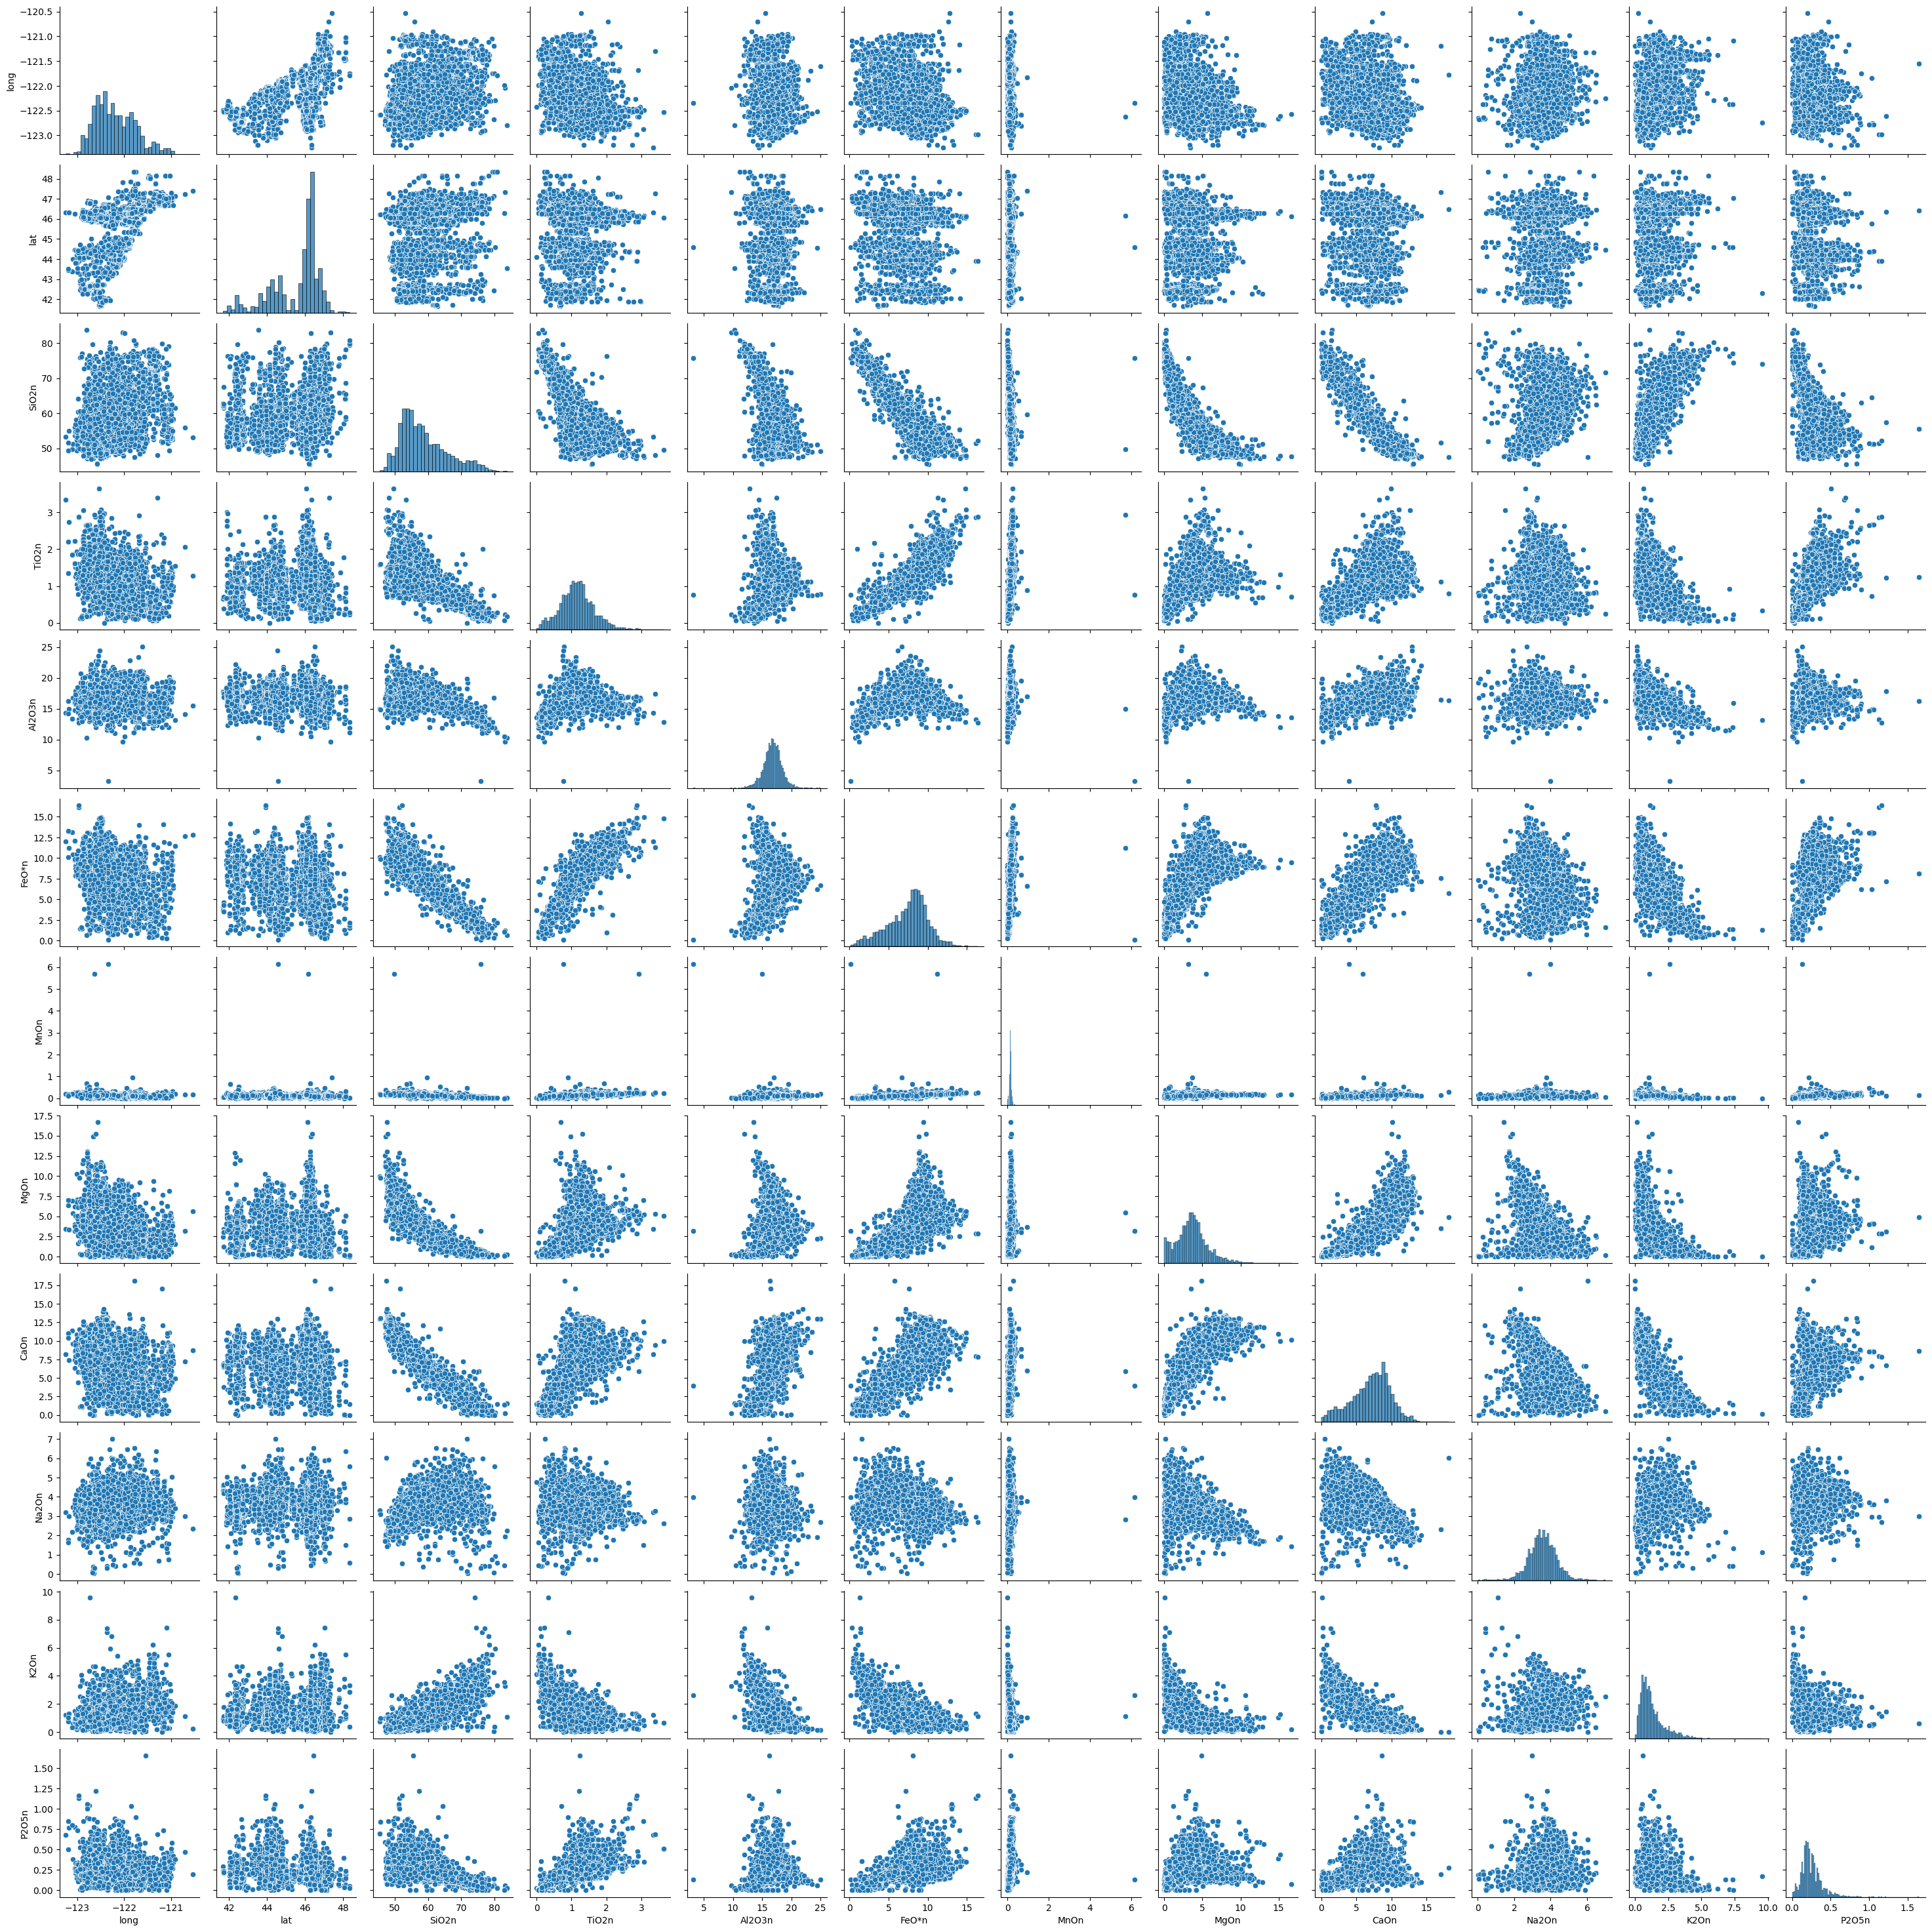

In [29]:
numeric_columns = data_cleaned.select_dtypes(include='number').columns
sns.pairplot(data_cleaned[numeric_columns])
plt.show()

In [30]:
correlation_matrix = data_cleaned.corr(numeric_only=True)

###Correlation Heat Map

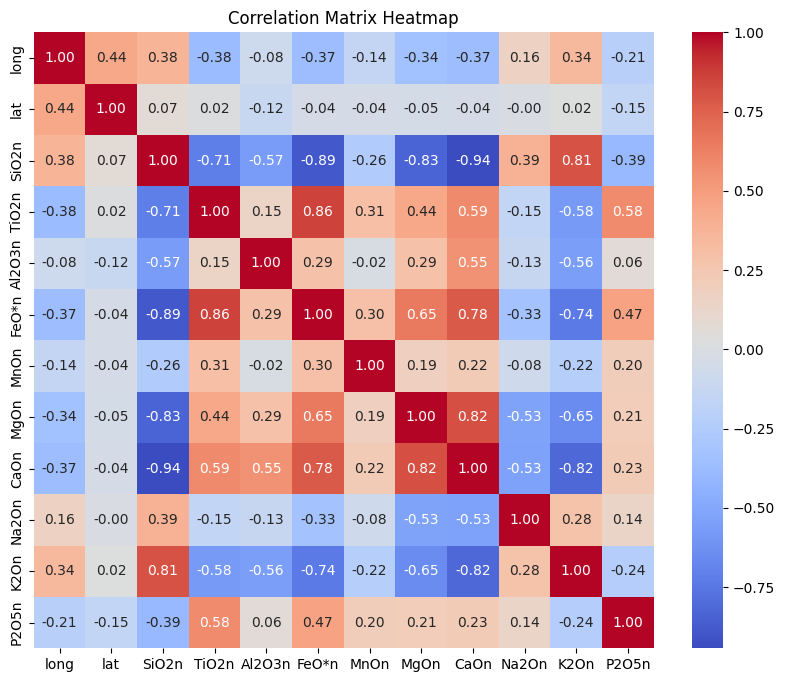

In [31]:
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

### ECDF Plots

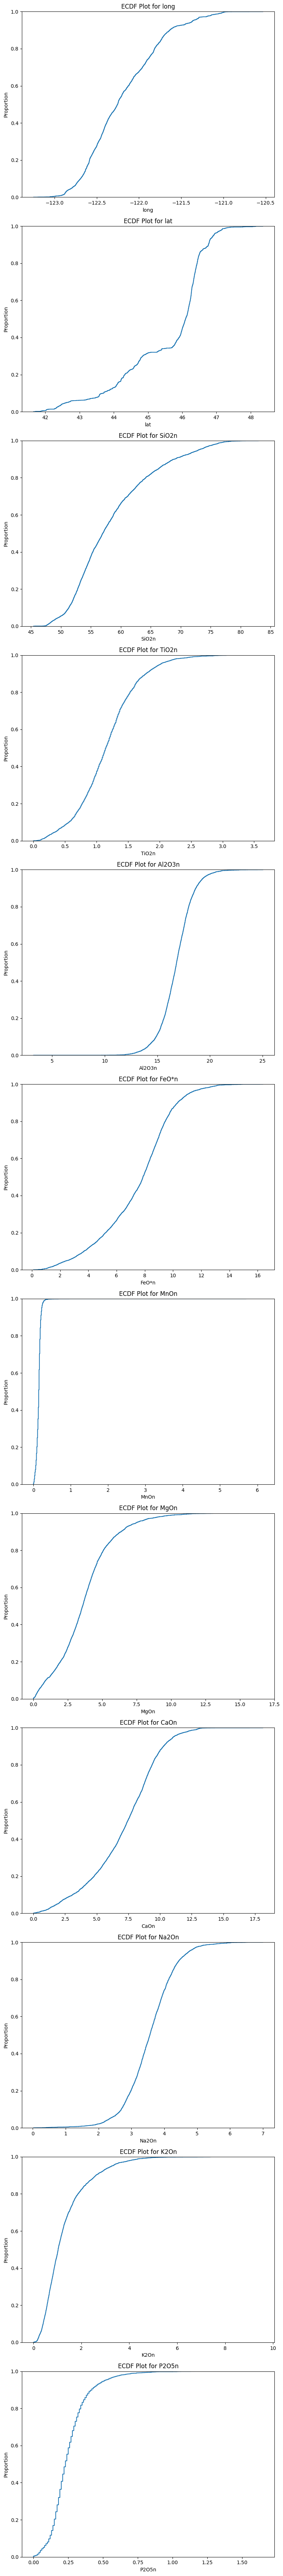

In [32]:
numeric_columns = data_cleaned.select_dtypes(include='number').columns
# Create ECDF plots for all numerical variables
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(8, 6 * len(numeric_columns))) # Create subplots

for i, column in enumerate(numeric_columns):
    sns.ecdfplot(data=data_cleaned, x=column, ax=axes[i])  # Plot ECDF on the subplot
    axes[i].set_title(f"ECDF Plot for {column}")  # Set title for each subplot

plt.tight_layout()  # Adjust subplot spacing to prevent overlap
plt.show()

As we can see from the EDA, there are visible correlations in the pair plots that are confirmed by the correlation heat map. The CDF plots show that some of the variables are normally distributed, while others are concentrated.

## Define features for Supervised models

In [ ]:
# Define features (X) and target (y)
X = data_cleaned.drop('rock_name', axis=1)
y = data_cleaned['rock_name']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Imputation and scaling
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

X_train = scaler.fit_transform(imputer.fit_transform(X_train))
X_test = scaler.transform(imputer.transform(X_test))

## Logistic Regression Model

In [41]:
lr_model = LogisticRegression(max_iter=1000, multi_class='multinomial')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(f"Logistic Regression Classification Report:\n{report_lr}\n")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.6727272727272727
Logistic Regression Classification Report:
                                     precision    recall  f1-score   support

                           Andesite       0.62      0.86      0.72       183
                   Andesite breccia       0.00      0.00      0.00         1
                      Andesite dike       0.00      0.00      0.00         5
                 Andesite intrusion       0.00      0.00      0.00         8
                Andesite intrusion        0.00      0.00      0.00         1
                Andesite intrusion?       0.00      0.00      0.00         1
                      Andesite plug       0.00      0.00      0.00         2
                      Andesite sill       0.00      0.00      0.00         3
                      Andesite tuff       0.00      0.00      0.00         3
                             Aplite       0.00      0.00      0.00         2
                             Basalt       0.84      0.85    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## K-Nearest Neighbors (KNN)

In [42]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")
print(f"KNN Classification Report:\n{report_knn}\n")

KNN Accuracy: 0.6666666666666666
KNN Classification Report:
                                     precision    recall  f1-score   support

                           Andesite       0.69      0.81      0.75       183
                   Andesite breccia       0.00      0.00      0.00         1
                      Andesite dike       0.00      0.00      0.00         5
                 Andesite intrusion       0.50      0.38      0.43         8
                Andesite intrusion        0.00      0.00      0.00         1
                Andesite intrusion?       0.00      0.00      0.00         1
                      Andesite plug       0.00      0.00      0.00         2
                      Andesite sill       0.00      0.00      0.00         3
                      Andesite tuff       0.00      0.00      0.00         3
                             Aplite       0.00      0.00      0.00         2
                             Basalt       0.72      0.75      0.74       119
               

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

## GradientBoostingClassifier

In [43]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")
print(f"Gradient Boosting Classification Report:\n{report_gb}\n")

Gradient Boosting Accuracy: 0.7163636363636363
Gradient Boosting Classification Report:
                                     precision    recall  f1-score   support

                   Altered andesite       0.00      0.00      0.00         0
                           Andesite       0.74      0.82      0.78       183
                   Andesite breccia       0.00      0.00      0.00         1
                      Andesite dike       0.17      0.20      0.18         5
                     Andesite dike?       0.00      0.00      0.00         0
                 Andesite intrusion       0.33      0.12      0.18         8
                Andesite intrusion        0.00      0.00      0.00         1
                Andesite intrusion?       0.00      0.00      0.00         1
                      Andesite plug       0.00      0.00      0.00         2
                      Andesite sill       0.00      0.00      0.00         3
                      Andesite tuff       0.00      0.00      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_